In [8]:
import numpy as np
import pandas as pd
import genData
import matplotlib as mpl
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from SOM import *

%matplotlib inline

Load our data sets for consistant and reproducible results

In [9]:
plt.style.use("seaborn")
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

In [10]:
seed = 637120123
genData.def_seed = seed

## Part A
### 1.

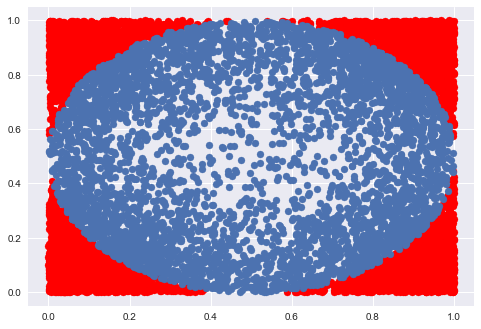

In [11]:
dataA1 = genData.create_A1(size=10000)

dataA1_bad = dataA1[1] 
dataA1 = dataA1[0]
plt.scatter(dataA1_bad[:,0],dataA1_bad[:,1],c='r')
plt.scatter(dataA1[:,0],dataA1[:,1])


In [12]:
dataA1

array([[0.03099411, 0.33094423],
       [0.71800201, 0.94959925],
       [0.595988  , 0.77846116],
       ...,
       [0.8799153 , 0.48588095],
       [0.6440424 , 0.97266934],
       [0.45116322, 0.09545729]])

In [13]:
model = SOM([100,1],0.1)
model.train(dataA1,(0,1))

TypeError: '<=' not supported between instances of 'tuple' and 'int'

### Model preformance